In [18]:
# 4.1 Plot the potential of the harmonic oscillator
# with some different values for the force constant k.

import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Constants
k_B = 1
T = 300
x = np.linspace(-100, 100, 400)
spring_constants = [0.5, 1, 2]


In [20]:
# Potential energy function
def V(x, k):
    return 0.5 * k * x**2

# Probability distribution function
def P(x, k):
    return np.sqrt(k / (2 * np.pi * k_B * T)) * np.exp(-0.5 * (k * x**2) / (k_B * T))  # prob density


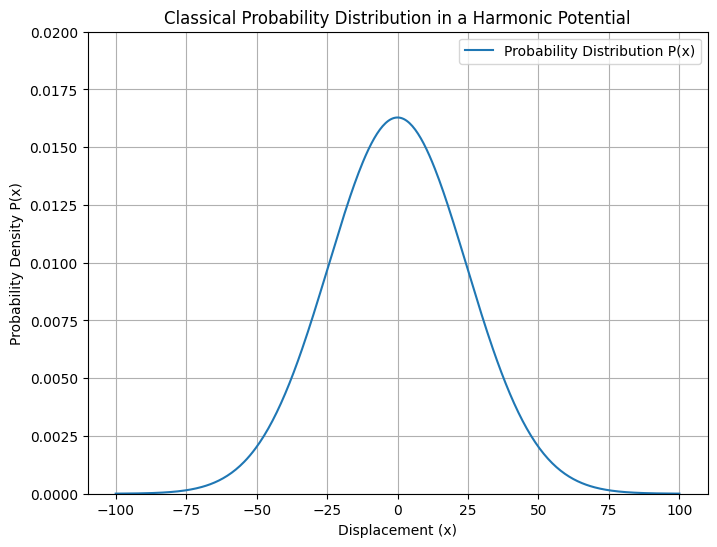

In [21]:
# Plot probability distribution
plt.figure(figsize=(8, 6))
plt.plot(x, P(x, spring_constants[0]), label='Probability Distribution P(x)')
plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('Classical Probability Distribution in a Harmonic Potential')
plt.ylim((0, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist.png')
plt.show()


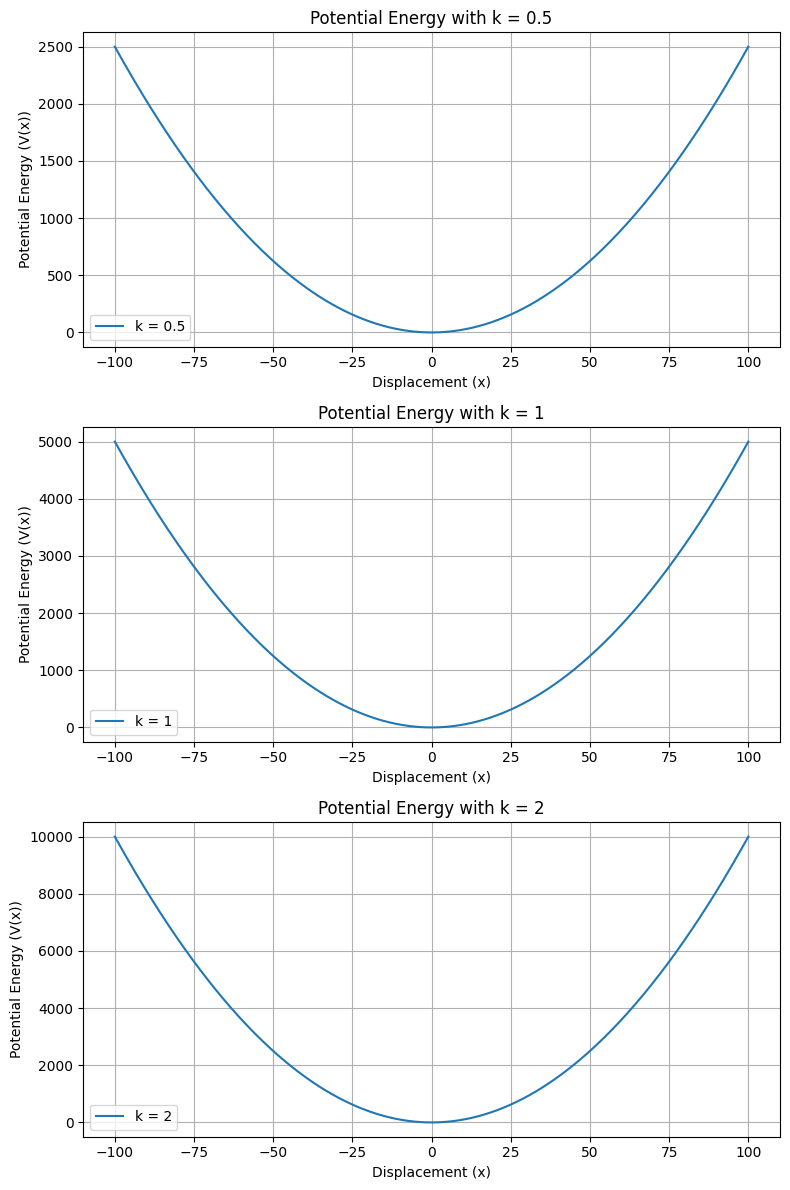

In [22]:
# Plot potential energies for different spring constants
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    V_values = V(x, k)
    axs[i].plot(x, V_values, label=f'k = {k}')
    axs[i].set_title(f'Potential Energy with k = {k}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Potential Energy (V(x))')
    axs[i].grid(True)
    # axs[i].set_xlim(x_range)
    # axs[i].set_ylim(y_range)
    axs[i].legend()

plt.tight_layout()
plt.savefig('HO_pot.png')
plt.show()


In [23]:
from scipy.integrate import quad

In [137]:
T = 300
# integrand for thermally averaged potential energy
def integrand(x):
    return V(x,k) * P(x,k)

# range for integration
x_min = -5
x_max = 5

# perform int
thermal_avg_V, _ = quad(integrand, x_min, x_max)

print(f"Thermally averaged potential energy at T=300K, k=1: {thermal_avg_V} J")

Thermally averaged potential energy at T=300K, k=1: 2.5826890485448044 J


In [135]:
# direct Monte Carlo sampling using C = 0.1
def direct_MC_sampling(k,T,x_min,x_max,num_samples):
    accepted_samples = []
    total_samples = 0

    C = 0.1 #P(x_min,T) 
    print(f"C = {C}")

    while len(accepted_samples) < num_samples:
        x_i = np.random.uniform(x_min,x_max)
        RND = np.random.rand()
        total_samples += 1
        if RND <= P(x_i, T) / C:
            accepted_samples.append(x_i)
        
        rejection_rate = 1 - len(accepted_samples) / total_samples
        # print(f"Accepted samples: {len(accepted_samples)}")
        # print(f"Total samples: {total_samples}")
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(accepted_samples)

In [32]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k)
    return np.mean(V_values)

In [134]:
x_min, x_max = -5,5
num_samples = 10000

samples = direct_MC_sampling(k,T,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

C = 0.1
Rejection Rate: 57.45%
Estimated thermally avg pot energy: 1.665161415482076 J


In [144]:
# evaluate heat cap of one oscillator: 
# 1. evaluate thermally avg pot energy at different T'samples
# 2. take derivative numerically

# def integrand(x):
#     return V(x,k) * P(x,k)
h = 1e-5
T_eval = 200
T = T_eval+h
V_plus, _ = quad(integrand, x_min, x_max)
T = T_eval-h
V_minus, _ = quad(integrand, x_min, x_max)

derivative = (V_plus - V_minus) / (2*h)
print(derivative)

-0.0038781479361205125
